# Матчинг изображений по характерным точкам

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Загружаем изображения для матчинга

In [2]:
img1 = cv2.imread('./data/box.png', cv2.IMREAD_GRAYSCALE)          # шаблон
img2 = cv2.imread('./data/box_in_scene.png', cv2.IMREAD_GRAYSCALE) # сцена

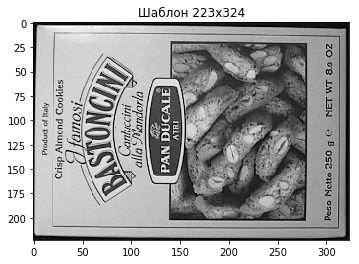

In [3]:
plt.imshow(img1, cmap='gray')
plt.title('Шаблон %dx%d' % img1.shape)

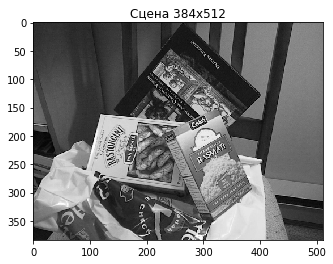

In [4]:
plt.imshow(img2, cmap='gray')
plt.title('Сцена %dx%d' % img2.shape)

## Ищем характерные точки и вычисляем для них дескрипторы

In [8]:
# https://en.wikipedia.org/wiki/Oriented_FAST_and_rotated_BRIEF

# инициализируем детектор точек
orb = cv2.ORB_create()

# запускаем поиск точек и вычисление дескрипторов
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [20]:
des2[0]

array([ 30,  83,  66, 175,  50,  18,  63, 252,  45,  12,  95, 231,  77,
        70, 139, 212, 118, 201, 205, 230, 192, 145,  45, 236, 176, 228,
       170, 131,  38, 151,  47, 117], dtype=uint8)

In [11]:
ds

array([ 25, 141,  92, 109, 178, 143,  93, 255, 116,  13, 252,   4,  63,
        51, 163,  48,  55,   2,   4,  44,  40, 152,  49,  31, 251, 239,
        52,   4, 250, 128, 226, 169], dtype=uint8)

## Отображаем найденные характерные точки

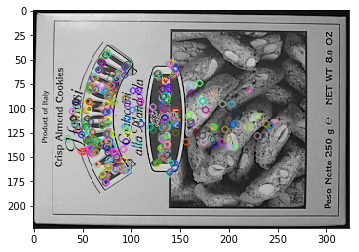

In [12]:
img1_kp = cv2.drawKeypoints(img1, kp1, np.zeros_like(img1))
plt.imshow(img1_kp)

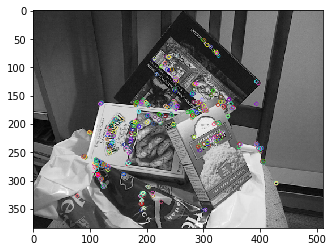

In [13]:
img2_kp = cv2.drawKeypoints(img2, kp2, np.zeros_like(img1))
plt.imshow(img2_kp)

## Ищем соответствия между шаблоном и сценой

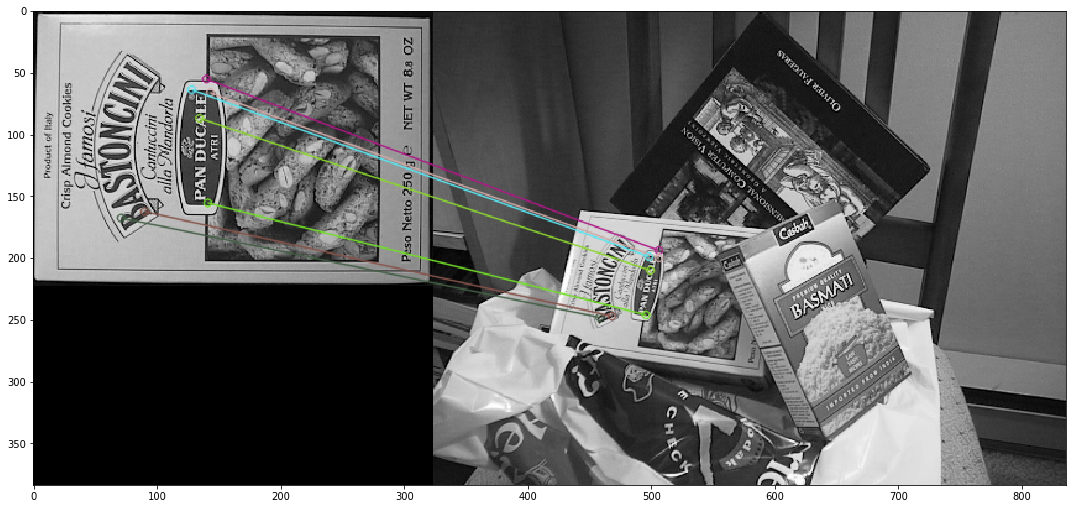

(<matplotlib.image.AxesImage at 0x1184cd400>, None)

In [18]:
# матчинг полным перебором - brute force matching
# мера расстояния - расстояние Хэмминга (количество несовпадающих компонент)
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# матчинг
matches = bf.match(des1, des2)

# сортируем результат по убыванию расстояния
matches = sorted(matches, key = lambda x: x.distance)

# выводим 10 лучших совпадений
img3 = np.zeros_like(img2)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:7], img3, flags=2)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(img3),plt.show()

In [25]:
m = matches[0]

In [34]:
m.distance

21.0

In [36]:
len(des2[m.trainIdx]) - m.distance

11.0

In [32]:
des2[m.trainIdx]

array([ 72, 243, 121, 232,  58, 220,  27,  20, 170, 204, 188, 172, 159,
       215, 194, 112,  86,  61, 221, 120, 195,   3, 242,  69, 251, 173,
        43, 248,  44, 146,   7, 115], dtype=uint8)

In [33]:
des1[m.queryIdx]

array([ 76, 242, 121, 232,  58, 204,  27,  17, 168, 204, 188, 236, 159,
       215, 194, 112, 214,  61, 253,  80, 202,   7, 242,  68, 251, 253,
        47, 248,   8, 130,   7, 115], dtype=uint8)

In [38]:
np.sum((des1[m.queryIdx] - des2[m.trainIdx]) == 0)

16

In [39]:
des1[m.queryIdx] - des2[m.trainIdx]

array([  4, 255,   0,   0,   0, 240,   0, 253, 254,   0,   0,  64,   0,
         0,   0,   0, 128,   0,  32, 216,   7,   4,   0, 255,   0,  80,
         4,   0, 220, 240,   0,   0], dtype=uint8)

In [40]:
des2[m.trainIdx].shape

(32,)

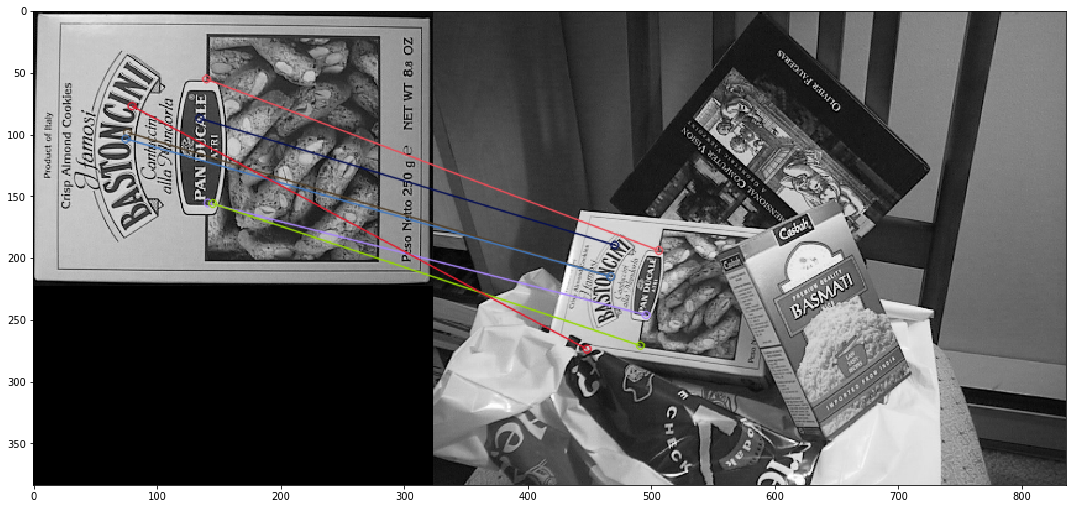

(<matplotlib.image.AxesImage at 0x115d9c780>, None)

In [17]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(img3),plt.show()

## Склейка панорамы
http://www.pyimagesearch.com/2016/01/11/opencv-panorama-stitching/

![img1](bryce_match_01.jpg)